In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
# Read data from CSV file
data = pd.read_csv(r"C:\Users\DELL\Desktop\B0006.csv")
data.head(20)


,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,1,24,2008-04-02 15:25:41,2.035338,4.179800,-0.002366,24.277568,-0.0006,0.000,0.000
1,1,24,2008-04-02 15:25:41,2.035338,4.179823,0.000434,24.277073,-0.0006,4.195,16.781
2,1,24,2008-04-02 15:25:41,2.035338,3.966528,-2.014242,24.366226,-1.9990,3.070,35.703
3,1,24,2008-04-02 15:25:41,2.035338,3.945886,-2.008730,24.515123,-1.9990,3.045,53.781
4,1,24,2008-04-02 15:25:41,2.035338,3.930354,-2.013381,24.676053,-1.9990,3.026,71.922
5,1,24,2008-04-02 15:25:41,2.035338,3.917440,-2.011192,24.853025,-1.9990,3.011,90.094
6,1,24,2008-04-02 15:25:41,2.035338,3.906451,-2.010007,25.018929,-1.9990,3.002,108.281
7,1,24,2008-04-02 15:25:41,2.035338,3.896511,-2.010279,25.204449,-1.9990,2.993,126.453
8,1,24,2008-04-02 15:25:41,2.035338,3.887994,-2.007998,25.380117,-1.9990,2.985,144.641
9,1,24,2008-04-02 15:25:41,2.035338,3.880200,-2.012029,25.554437,-1.9990,2.977,162.844


In [80]:
# Extract input features (voltage_measured', 'current_measured', 'temperature_measured','voltage_load) and SOC values
X = data[['voltage_measured', 'current_measured', 'temperature_measured','voltage_load']].values
soc = data['capacity'].values
print(soc)


[2.03533759 2.03533759 2.03533759 ... 1.18567523 1.18567523 1.18567523]


In [81]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, soc, test_size=0.001, random_state=42)
print(y_test)

[1.31011868 1.83925089 1.47321484 1.3052162  1.25343543 1.73378874
 1.86756972 1.15381833 1.31011868 1.72920703 1.38383795 1.78100463
 1.5093915  1.78100463 1.4413804  1.46276044 1.77101304 1.7394925
 1.37860599 1.77101304 1.35809661 1.20561598 1.39453438 1.58762731
 1.37376003 1.60352449 1.96816618 1.17967068 1.32090257 1.76047124
 1.56134461 1.37376003 1.86756972 1.75029138 1.34743288 1.17967068
 1.2480875  1.74474098 1.81347701 1.53015703 1.17497488 1.96878983
 1.26376394 1.85602441 1.85602441 1.47321484 1.56134461 1.3951643
 1.43155763 1.25343543 1.21110268]


In [82]:
len(y_test)

51

In [85]:
# Train a Random Forest regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [86]:
 #Make predictions on the testing set
soc_predictions = random_forest_model.predict(X_test)
print(soc_predictions)

[1.28665128 1.67130282 1.42315742 1.33690527 1.26244984 1.7554296
 1.89178052 1.28842311 1.26923029 1.67797399 1.38734958 1.67233891
 1.52809986 1.63610769 1.43468163 1.46512818 1.78223296 1.78578841
 1.37508636 1.65201562 1.37586581 1.20584212 1.43482165 1.42235245
 1.40791297 1.62409284 1.96842989 1.24376348 1.37618169 1.60126392
 1.41237282 1.43975529 1.89279501 1.72621603 1.49952129 1.21987659
 1.20979117 1.81393755 1.55623596 1.47731095 1.24606394 1.98201131
 1.26966441 1.84886953 1.82761663 1.44068738 1.5222785  1.37957659
 1.40482316 1.19094196 1.21073816]


In [87]:
from sklearn.metrics import mean_squared_error


In [88]:


# Assuming y_test and soc_predictions are your actual test labels and predictions
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, soc_predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.006081014941874113


In [89]:

# Model evaluation
mse = mean_squared_error(y_test, soc_predictions)
r2 = r2_score(y_test, soc_predictions)
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Squared Error: 0.006081014941874113
R-squared: 0.8951885829374088


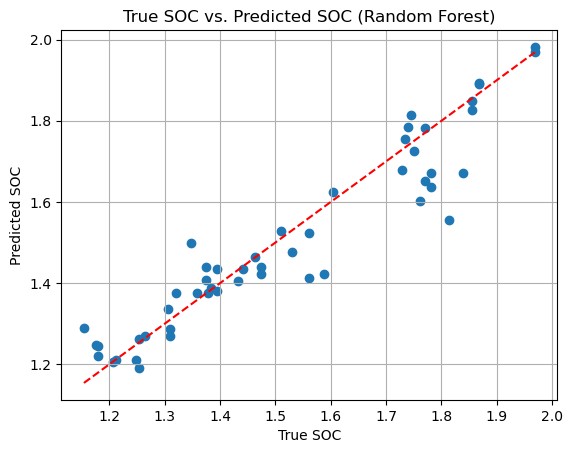

In [90]:

# Plot the true SOC values vs. predicted SOC values
plt.scatter(y_test, soc_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('True SOC')
plt.ylabel('Predicted SOC')
plt.title('True SOC vs. Predicted SOC (Random Forest)')
plt.grid(True)
plt.show()

In [91]:
predictions_df = pd.DataFrame({
    'Actual state of charging': (y_test),# current load other name state of health

    'Predicted state of charging ': (soc_predictions)
})

# Display the DataFrame
print(predictions_df)

    Actual state of charging  Predicted state of charging 
0                   1.310119                      1.286651
1                   1.839251                      1.671303
2                   1.473215                      1.423157
3                   1.305216                      1.336905
4                   1.253435                      1.262450
5                   1.733789                      1.755430
6                   1.867570                      1.891781
7                   1.153818                      1.288423
8                   1.310119                      1.269230
9                   1.729207                      1.677974
10                  1.383838                      1.387350
11                  1.781005                      1.672339
12                  1.509392                      1.528100
13                  1.781005                      1.636108
14                  1.441380                      1.434682
15                  1.462760                      1.4651

In [59]:
from sklearn.metrics import confusion_matrix

In [92]:
from sklearn.metrics import confusion_matrix


In [93]:
print(y_test)

[1.31011868 1.83925089 1.47321484 1.3052162  1.25343543 1.73378874
 1.86756972 1.15381833 1.31011868 1.72920703 1.38383795 1.78100463
 1.5093915  1.78100463 1.4413804  1.46276044 1.77101304 1.7394925
 1.37860599 1.77101304 1.35809661 1.20561598 1.39453438 1.58762731
 1.37376003 1.60352449 1.96816618 1.17967068 1.32090257 1.76047124
 1.56134461 1.37376003 1.86756972 1.75029138 1.34743288 1.17967068
 1.2480875  1.74474098 1.81347701 1.53015703 1.17497488 1.96878983
 1.26376394 1.85602441 1.85602441 1.47321484 1.56134461 1.3951643
 1.43155763 1.25343543 1.21110268]


In [94]:
print(soc_predictions)

[1.28665128 1.67130282 1.42315742 1.33690527 1.26244984 1.7554296
 1.89178052 1.28842311 1.26923029 1.67797399 1.38734958 1.67233891
 1.52809986 1.63610769 1.43468163 1.46512818 1.78223296 1.78578841
 1.37508636 1.65201562 1.37586581 1.20584212 1.43482165 1.42235245
 1.40791297 1.62409284 1.96842989 1.24376348 1.37618169 1.60126392
 1.41237282 1.43975529 1.89279501 1.72621603 1.49952129 1.21987659
 1.20979117 1.81393755 1.55623596 1.47731095 1.24606394 1.98201131
 1.26966441 1.84886953 1.82761663 1.44068738 1.5222785  1.37957659
 1.40482316 1.19094196 1.21073816]


In [95]:
 #Convert predictions and true labels to binary format
# For example, let's assume we're interested in binary classification where 1 is positive and 0 is negative
threshold = 0.5  # You can adjust this threshold based on your problem
y_pred_binary = [1 if pred >= threshold else 0 for pred in soc_predictions]
y_true_binary = [1 if true >= threshold else 0 for true in y_test]


In [96]:
print(y_true_binary)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [97]:
print(y_pred_binary)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [98]:
conf_matrix = confusion_matrix(y_true_binary,y_pred_binary )

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[51]]


In [99]:
from sklearn.metrics import f1_score

In [100]:
# Calculate F1 score
f1 = f1_score(y_true_binary, y_pred_binary, average='weighted')
print("F1 Score:", f1)


F1 Score: 1.0


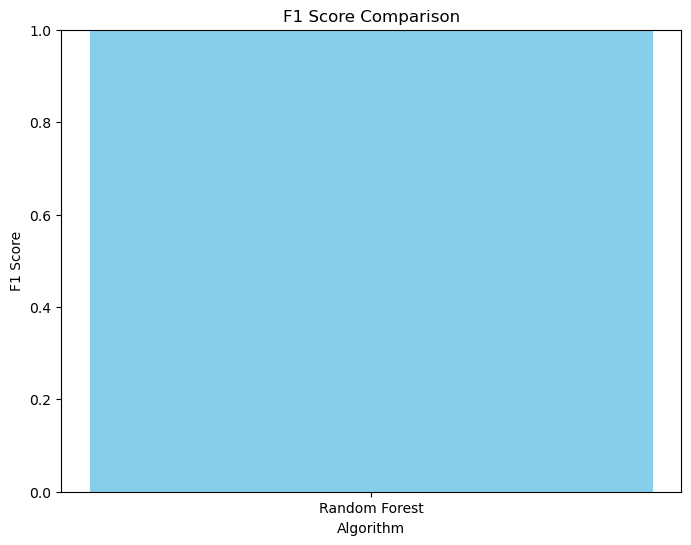

In [108]:
# Plot F1 score
plt.figure(figsize=(8, 6))
plt.bar(["Random Forest"], [f1], color='skyblue')
plt.title("F1 Score Comparison")
plt.xlabel("Algorithm")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.show()

In [101]:
# Ensure that soc_predictions contain valid class labels and is of the same length as y_test
print("Length of y_test:", len(y_test))
print("Length of soc_predictions:", len(soc_predictions))

Length of y_test: 51
Length of soc_predictions: 51


In [102]:
# Print unique values in soc_predictions
print("Unique values in soc_predictions:", set(soc_predictions))


Unique values in soc_predictions: {1.2866512784140582, 1.2624498422784283, 1.336905270969754, 1.6713028189245513, 1.4231574189781853, 1.7554296040439694, 1.891780516389814, 1.2884231087259943, 1.269230290581017, 1.6779739926134933, 1.7857884133474844, 1.4397552883687297, 1.2097911742998662, 1.6520156184276333, 1.2058421186518802, 1.7262160268457125, 1.3873495768156539, 1.434681628243443, 1.375086361481284, 1.5562359609804202, 1.522278500331359, 1.4048231555597792, 1.2107381574496086, 1.7822329576121507, 1.6240928360283824, 1.3761816912141274, 1.982011311560531, 1.5280998641546892, 1.8927950137453555, 1.2198765944321837, 1.813937548115086, 1.47731094809608, 1.2460639430336071, 1.379576592555595, 1.1909419590774215, 1.6361076904669585, 1.4223524543777881, 1.2437634828763298, 1.4995212865926828, 1.672338914853737, 1.4348216538238403, 1.4079129693529864, 1.269664414877647, 1.8488695252235323, 1.8276166311670923, 1.4651281830501472, 1.3758658138957782, 1.9684298934467959, 1.6012639183820079

In [103]:
# Print unique values in y_test
print("Unique values in y_test:", set(y_test))


Unique values in y_test: {1.2534354284944844, 1.3101186784831065, 1.473214844899973, 1.30521620229393, 1.839250891718188, 1.7337887419624838, 1.8675697161520208, 1.15381833159625, 1.729207034132373, 1.3838379472327809, 1.35809661401726, 1.9681661764334244, 1.1796706818144624, 1.3474328767273906, 1.1749748834769171, 1.509391504602082, 1.7810046294120476, 1.441380399427779, 1.3209025697502388, 1.96878982627284, 1.4627604396099307, 1.3786059891863676, 1.5876273123575604, 1.3737600299108574, 1.5613446139713882, 1.263763942644078, 1.211102678915174, 1.3945343832614077, 1.7604712448170945, 1.431557632772571, 1.2056159765131735, 1.2480874960313575, 1.7447409841836798, 1.7710130422682329, 1.8134770059567056, 1.8560244070083, 1.7394925037732578, 1.6035244898969248, 1.7502913788006589, 1.5301570318067428, 1.395164296571563}


In [19]:
from sklearn.metrics import f1_score



In [104]:
# Generate confusion matrix only if lengths match
if len(y_true_binary) == len(y_pred_binary):
    conf_matrix = confusion_matrix(y_true_binary, y_pred_binary)
    print("\nConfusion Matrix:\n", conf_matrix)
else:
    print("Lengths of y_test and soc_predictions do not match. Please check your data.")


Confusion Matrix:
 [[51]]


In [105]:
import seaborn as sns

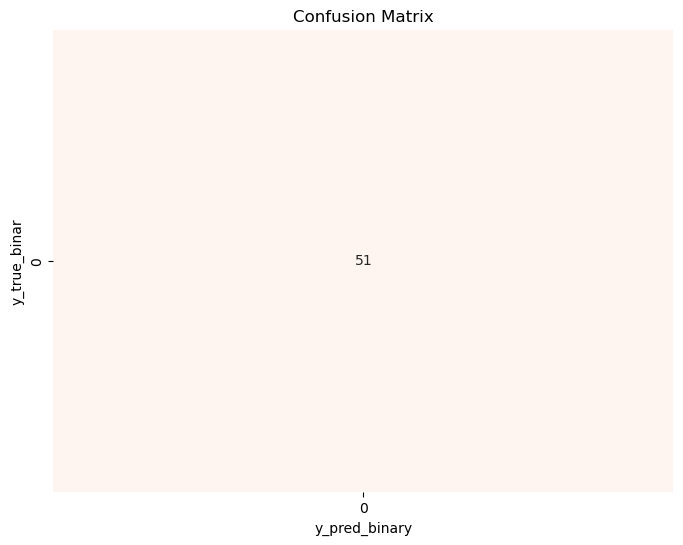

In [107]:

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("y_pred_binary")
plt.ylabel("y_true_binar")
plt.show()